<a href="https://colab.research.google.com/github/ajdhiman/Deep-Learning/blob/main/CNN_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.5 MB/s eta 0:00:00


In [32]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=c524eb37d99f6662315ffe505574b03206560e5fddde0f62a3313a91d7a76657
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [4]:
import tflearn.datasets.oxflower17 as oxflower17
x,y = oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [5]:
x.shape

(1360, 224, 224, 3)

In [6]:
y.shape

(1360, 17)

In [7]:
model =  Sequential()
model.add(Conv2D(96,kernel_size=(11,11),padding='valid',input_shape=(224, 224, 3),strides=(4,4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(BatchNormalization())


model.add(Conv2D(256,kernel_size=(5,5),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(BatchNormalization())


model.add(Conv2D(384,kernel_size=(3,3),padding='valid',strides=(1,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(384,kernel_size=(3,3),padding='valid',strides=(1,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(256,kernel_size=(3,3),padding='valid',strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())


model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 26, 26, 256)       0

In [8]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="acc",min_delta=0.0001,patience=5,verbose=1,mode="auto",baseline=None,restore_best_weights=False)


In [10]:
model.fit(x, y,validation_split=0.33,batch_size=65,epochs=100,callbacks=[early_stopping])

Train on 911 samples, validate on 449 samples
Epoch 1/100
911/911 [==============================] - ETA: 0s - loss: 9.5424 - acc: 0.1010

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


911/911 [==============================] - 14s 15ms/sample - loss: 9.5424 - acc: 0.1010 - val_loss: 3274714.2060 - val_acc: 0.0668
Epoch 2/100
911/911 [==============================] - 1s 1ms/sample - loss: 7.1215 - acc: 0.1910 - val_loss: 95990.7473 - val_acc: 0.0557
Epoch 3/100
911/911 [==============================] - 1s 1ms/sample - loss: 5.8965 - acc: 0.2053 - val_loss: 15471.2819 - val_acc: 0.0668
Epoch 4/100
911/911 [==============================] - 1s 2ms/sample - loss: 4.5722 - acc: 0.2645 - val_loss: 5630.4191 - val_acc: 0.0646
Epoch 5/100
911/911 [==============================] - 1s 2ms/sample - loss: 4.4349 - acc: 0.2799 - val_loss: 2490.2544 - val_acc: 0.0757
Epoch 6/100
911/911 [==============================] - 1s 2ms/sample - loss: 4.0539 - acc: 0.2931 - val_loss: 536.7814 - val_acc: 0.0869
Epoch 7/100
911/911 [==============================] - 1s 1ms/sample - loss: 3.3682 - acc: 0.3085 - val_loss: 58.2821 - val_acc: 0.1448
Epoch 8/100
911/911 [=====================

In [20]:
model.save("flower17.H5")

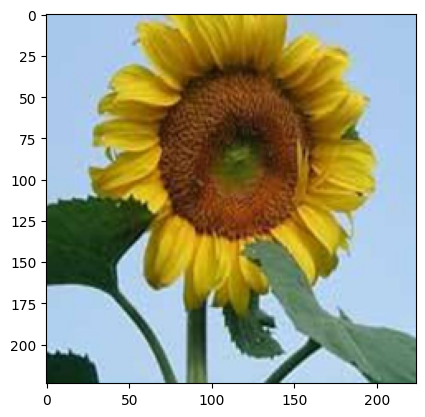

In [53]:
plt.imshow(x[3:4].reshape(224, 224, 3))

In [58]:
xNew = x[:4]
yProbablity = model.predict(xNew)
yProbablity.round(3)

array([[0.   , 0.   , 0.918, 0.   , 0.   , 0.   , 0.   , 0.079, 0.003,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.068, 0.001, 0.   , 0.   , 0.   , 0.   , 0.85 , 0.   ,
        0.023, 0.001, 0.057, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.012, 0.   , 0.001, 0.   , 0.034,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.953]],
      dtype=float32)

In [59]:
yPred = np.argmax(yProbablity,axis=-1)
yPred

array([ 2,  7,  8, 16])

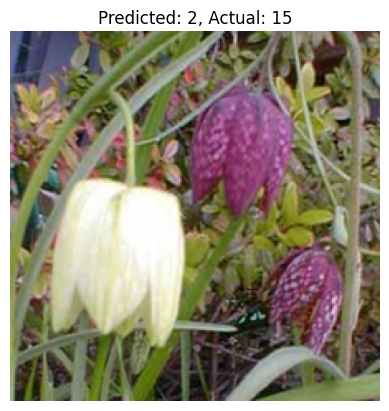

------------------------------------------------------------


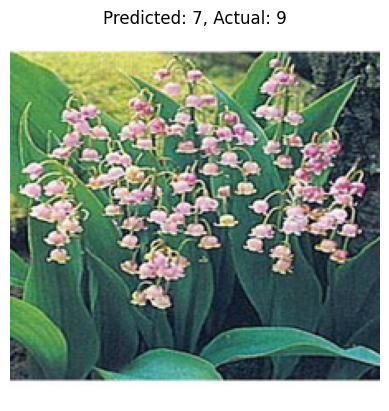

------------------------------------------------------------


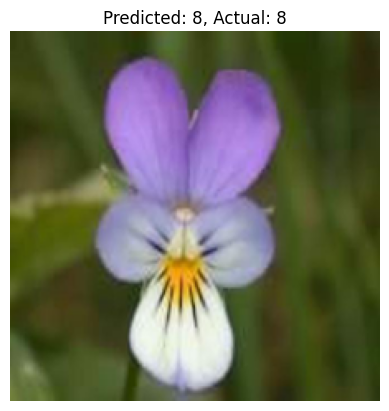

------------------------------------------------------------


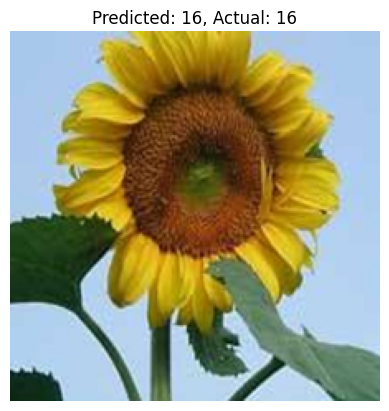

------------------------------------------------------------


In [61]:
for img_array, pred, actual in zip(xNew, yPred, y[0:4]):
  plt.imshow(img_array)
  plt.title(f"Predicted: {pred}, Actual: {np.argmax(actual,axis=-1)}")
  plt.axis("off")
  plt.show()
  print("--"*30)